In [1]:
StudentName = "Mohammad Ali Etemadi Naeen"
StudentID   = "402200348"

print (f'StudentName:{StudentName} , StudentID:{StudentID}')

StudentName:Mohammad Ali Etemadi Naeen , StudentID:402200348


# **Import Libraries**

In [2]:
from __future__ import print_function

import sklearn
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import IPython
import matplotlib

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib.cm import viridis
from matplotlib.colors import Normalize

# Read the dataset

## import dataset

In [ ]:
df = pd.read_csv("./Boston.csv")
df

CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

## information about dataset

In [4]:
print('Shape of Training dataset:', df.shape)

print('\ncolumns name:\n', df.columns)

print('\nnumber of Null Values in each column:\n', df.isnull().sum())

Shape of Training dataset: (506, 14)

columns name:
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

number of Null Values in each column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
print('\nTypes of each column:\n', df.dtypes)


Types of each column:
 CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NX         float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.describe()

CRIM          ZN       INDUS        CHAS          NX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

**print(boston.DESCR)**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
...
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

Downloaded from openml.org.
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

## plots

### corr

<Axes: >

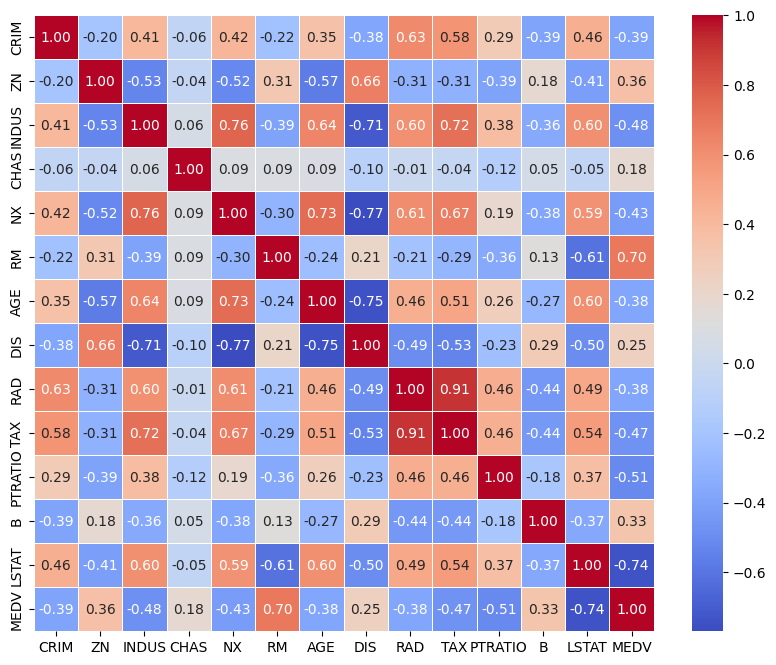

In [47]:
# heatmap of correlation
corr = df.corr()
corr.shape

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

<div style="text-align: center; direction: rtl;">
همانطور که مشخص است بیشترین همبستگی با خروجی (MEDV) مربوط به سه ویژگی LSTAT, RM و PTRATIO می شود.
</div>

### pair plot

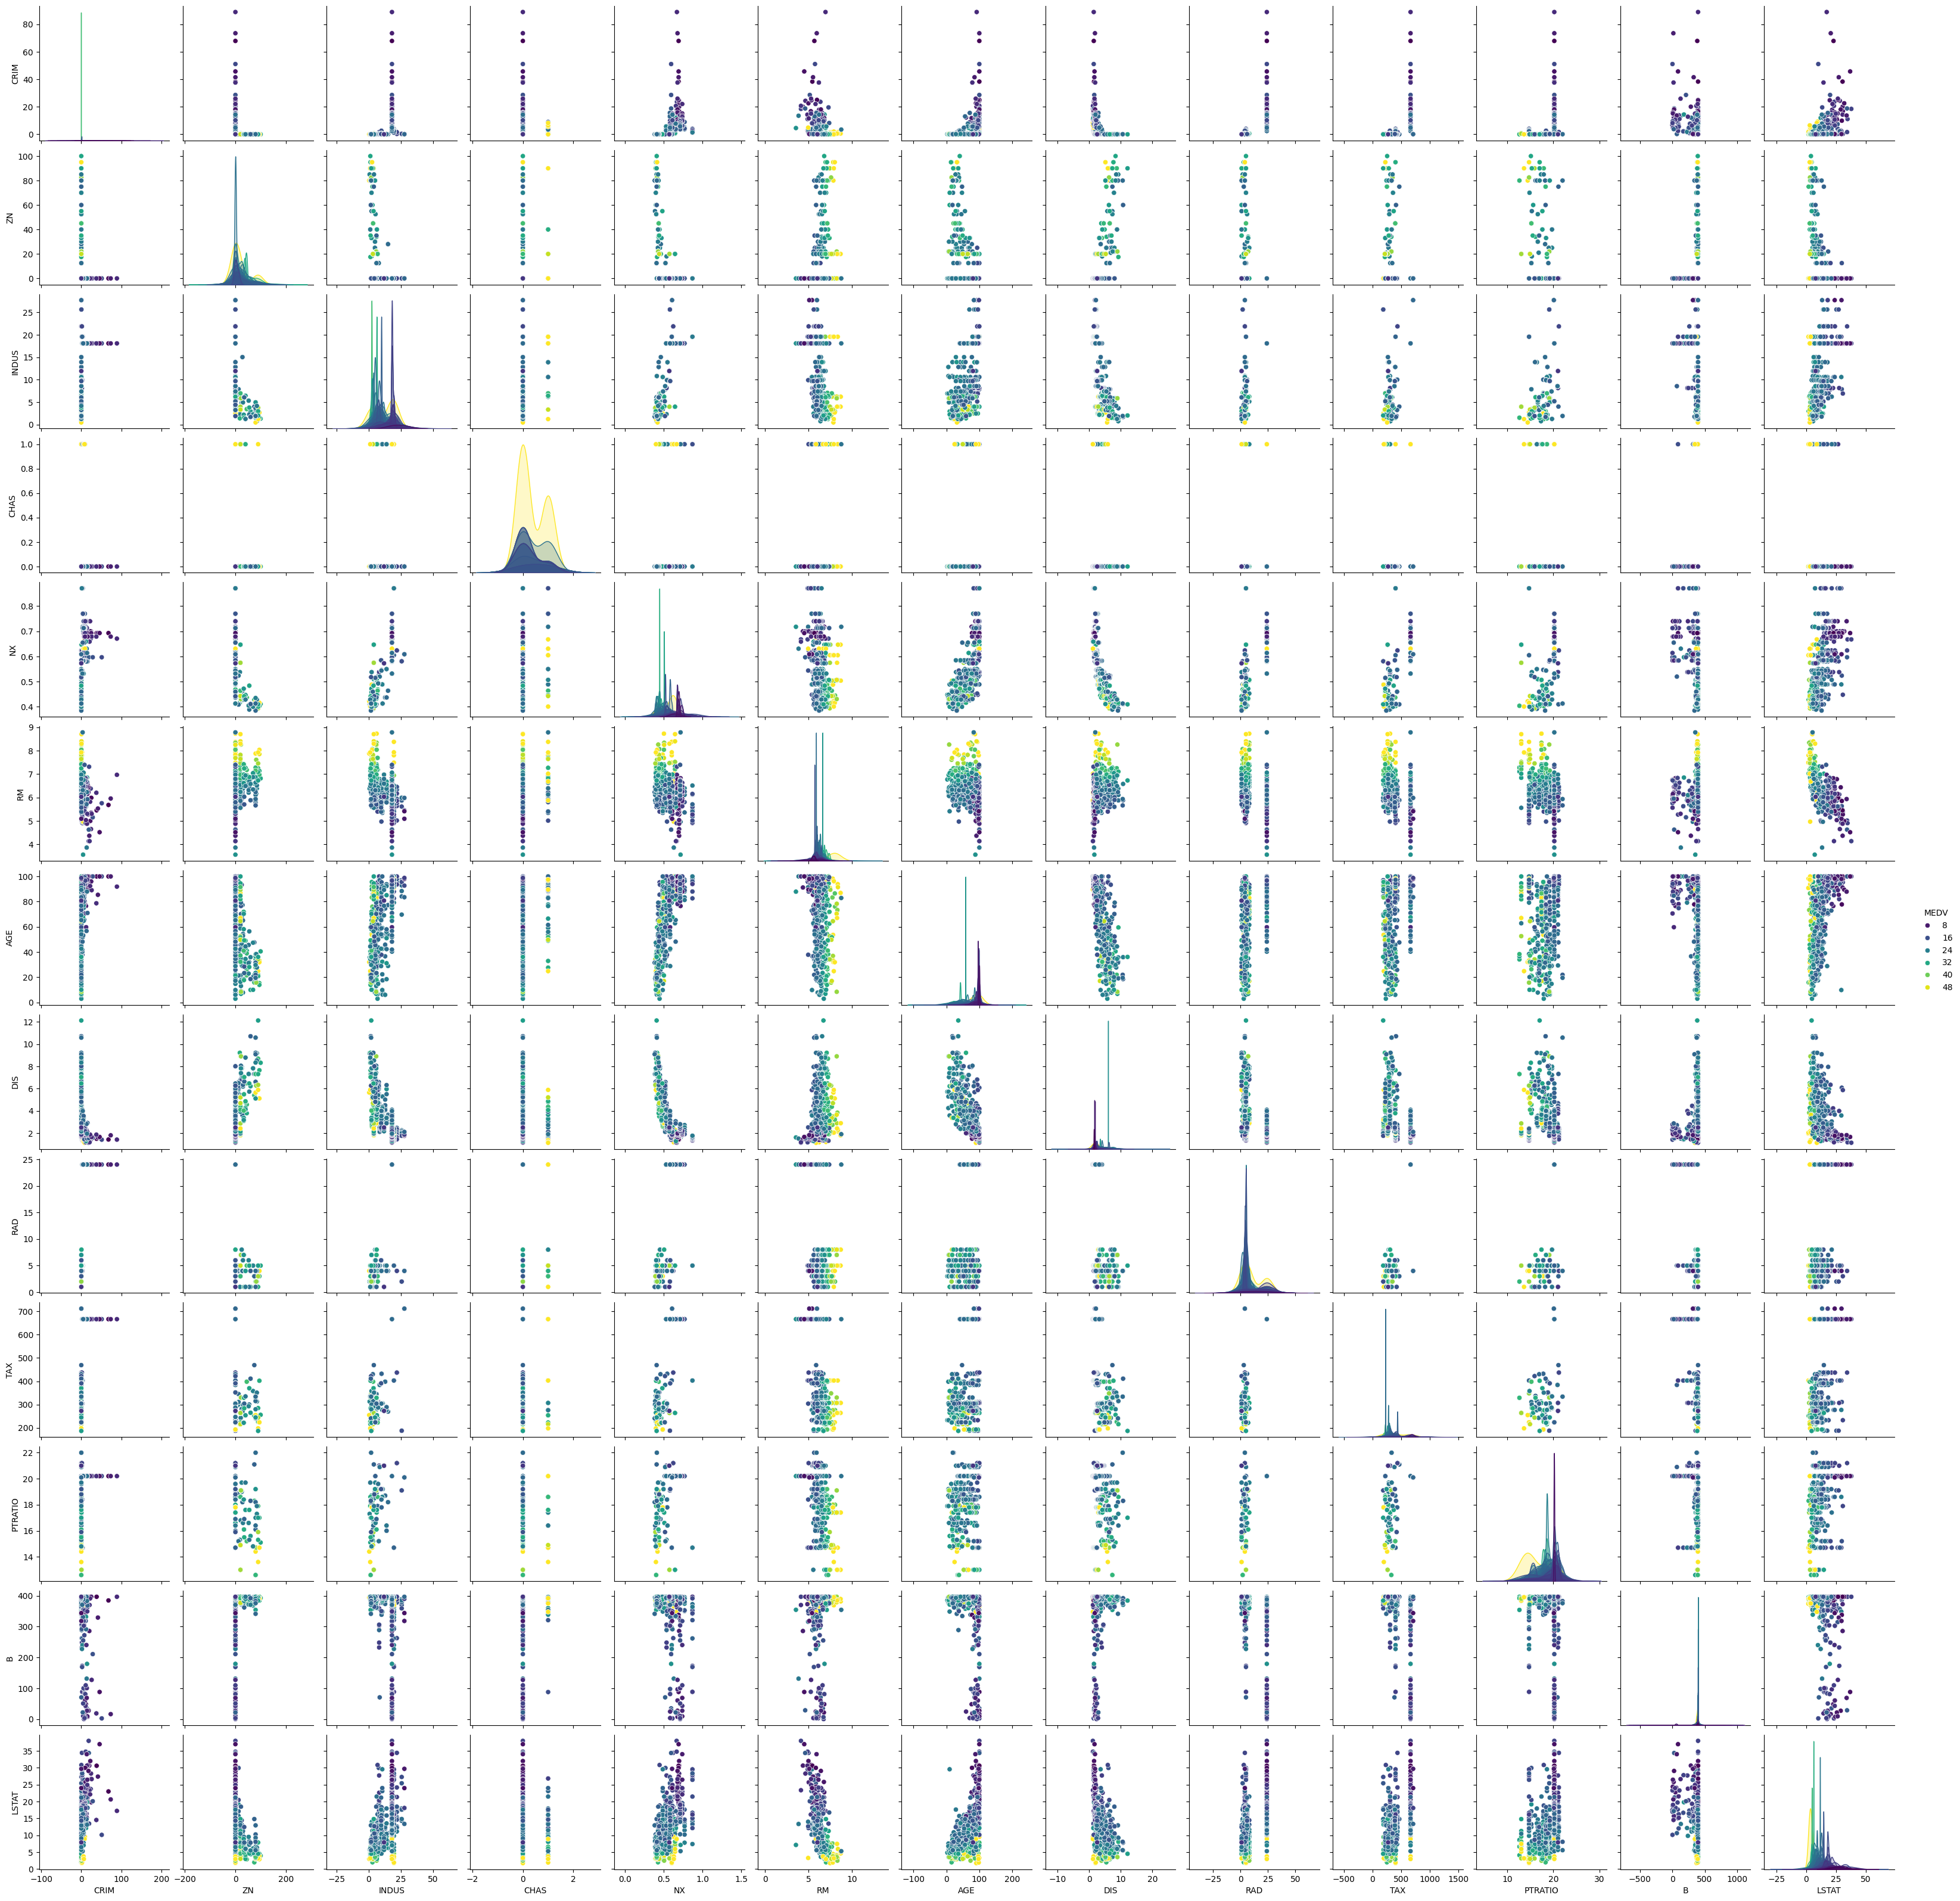

In [8]:
sns.pairplot(data=df, hue='MEDV', palette="viridis")
plt.show()

---
# A)

In [5]:
features = df.drop('MEDV', axis=1)
y_target = df['MEDV']

Xtrain, Xtest, ytrain, ytest = train_test_split(features, y_target, test_size=0.3, random_state=42)

In [6]:
# model = LinearRegression()
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(features, y_target)

# calculating coefficients vector
linear_regression_step = model.named_steps['linearregression']
# Get the coefficients and intercept
coefficients = linear_regression_step.coef_
intercept = linear_regression_step.intercept_

print('coefficients:\n', coefficients)
print('\nintercept:\n', intercept)

coefficients:
 [-0.92814606  1.08156863  0.1409      0.68173972 -2.05671827  2.67423017
  0.01946607 -3.10404426  2.66221764 -2.07678168 -2.06060666  0.84926842
 -3.74362713]

intercept:
 22.532806324110677


In [7]:
# Model Training
model.fit(Xtrain, ytrain)

# calculating Coefficients vector
coefficients = linear_regression_step.coef_
intercept = linear_regression_step.intercept_
print("Coefficients:\n", coefficients)
print("Intercept:", intercept)

# Predict
train_predictions = model.predict(Xtrain)
test_predictions = model.predict(Xtest)

# calculate the MSE
train_mse = mean_squared_error(ytrain, train_predictions)
test_mse = mean_squared_error(ytest, test_predictions)
print("\nTrain MSE:", train_mse)
print("Test MSE:", test_mse)

# calculate the R^2
train_r2 = r2_score(ytrain, train_predictions)
test_r2 = r2_score(ytest, test_predictions)
print("\nTrain R-squared:", train_r2)
print("Test R-squared:", test_r2)

Coefficients:
 [-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
Intercept: 23.01581920903955

Train MSE: 22.545481487421423
Test MSE: 21.517444231177215

Train R-squared: 0.7434997532004697
Test R-squared: 0.7112260057484932


---
# B)

## Use iteration for forward selection

In [8]:
selected_features = []
best_score = 0

while len(selected_features) < 3:  
    best_feature = None
    for feature in Xtrain.columns:
        if feature not in selected_features:
            features_to_try = selected_features + [feature]
            model = make_pipeline(StandardScaler(), LinearRegression())
            model.fit(Xtrain[features_to_try], ytrain)
            predictions = model.predict(Xtest[features_to_try])
            score = model.score(Xtest[features_to_try], ytest)  
            if score > best_score:
                best_score = score
                best_feature = feature
    if best_feature:
        selected_features.append(best_feature)
    else:
        break


print("Top 3 Features:", selected_features)

model.fit(Xtrain[selected_features], ytrain)
predictions_train = model.predict(Xtrain[selected_features])
predictions_test = model.predict(Xtest[selected_features])

# Calculate MSE
mse_train = mean_squared_error(ytrain, predictions_train)
mse_test = mean_squared_error(ytest, predictions_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Top 3 Features: ['LSTAT', 'RM', 'PTRATIO']
Train MSE: 27.687244667341563
Test MSE: 26.01221192212625


## Use Sequential Feature Selector for forward selection

In [9]:
sfs = SequentialFeatureSelector(model, n_features_to_select=3, direction='forward')
sfs = sfs.fit(Xtrain, ytrain)

selected_features = Xtrain.columns[sfs.get_support()]

Xtrain_top_features = Xtrain[selected_features]
Xtest_top_features = Xtest[selected_features]

model.fit(Xtrain_top_features, ytrain)
train_predictions = model.predict(Xtrain_top_features)
test_predictions = model.predict(Xtest_top_features)

# Calculate MSE & R^2 & Coefficients
train_mse = mean_squared_error(ytrain, train_predictions)
test_mse = mean_squared_error(ytest, test_predictions)
train_r2 = r2_score(ytrain, train_predictions)
test_r2 = r2_score(ytest, test_predictions)
coefficients = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_

# results
print("Top Features:", selected_features)
print("\nTrain MSE:", train_mse)
print("Test MSE:", test_mse)
print("\nTrain R-squared (R2):", train_r2)
print("Test R-squared (R2):", test_r2)
print("\nCoefficients:", coefficients)
print("Intercept:", intercept)

Top Features: Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')

Train MSE: 27.687244667341563
Test MSE: 26.012211922126255

Train R-squared (R2): 0.6850018441906278
Test R-squared (R2): 0.650904156861472

Coefficients: [ 3.20431505 -1.94464366 -4.31929392]
Intercept: 23.01581920903955


<div style="text-align: right; direction: rtl;">

 - همانطور که مشخص است، سه ویژگی LSTAT, RM و PTRATIO به عنوان برترین ویژگی ها انتخاب می شوند. این نتیجه مطابق انتظار نیز است؛ چون در قسمت قبل از طریق بررسی همبستگی بین ویژگی ها با خروجی، به همین نتیجه رسیده بودیم.

 - در رابطه با خطای MSE و R^2، از آنجایی که تنها 3 ویژگی را برای بررسی انتخاب کرده ایم نتایج کمی بدتر شده است (خطای MSE کمی بیشتر از حالت قبل و مقدار R^2 نیز کاهش یافته است)؛ ولی کاهش محاسبات و حجم پردازش را داشته ایم. به نوعی یک trade off برقرار است که در واقع کمی از دقت را فدای کم کردن حجم محاسبات و پردازش کرده ایم.
</div>

---

# C)

## Explained Variance ratio for Principal Components

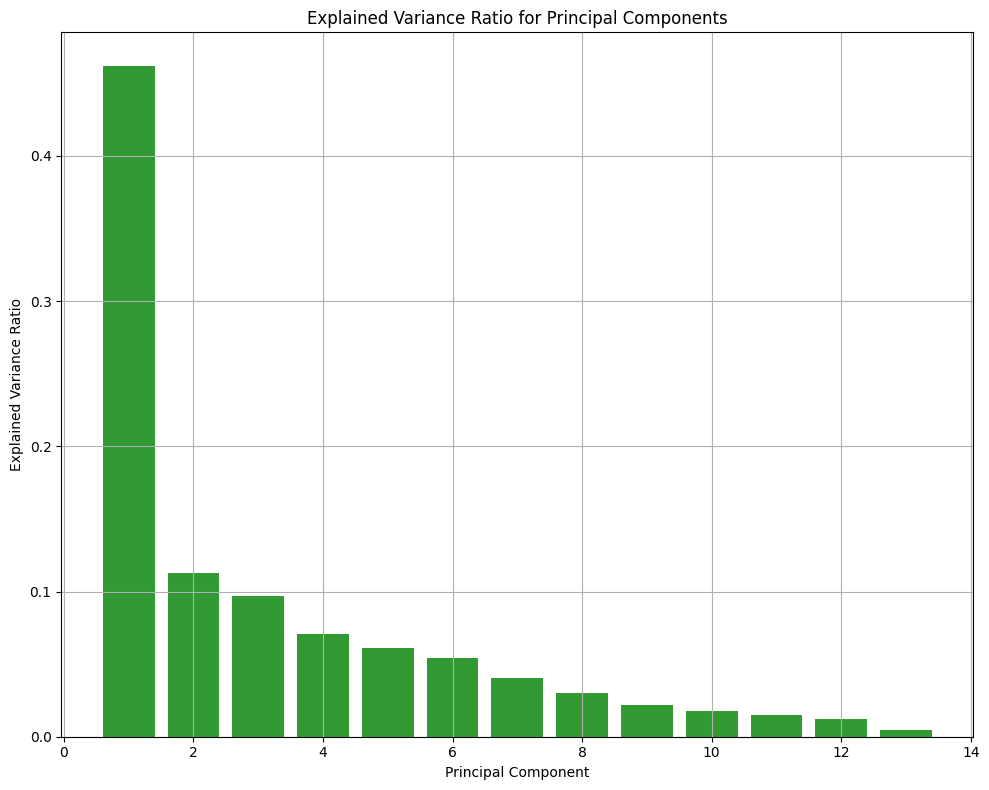

In [12]:
features = df.drop('MEDV', axis=1)
y_target = df['MEDV']

Xtrain, Xtest, ytrain, ytest = train_test_split(features, y_target, test_size=0.3, random_state=42)

# Standardize & Zero-mean
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xtrain)

# use PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio for each principal component
explained_var_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.figure(figsize=(10, 8))
plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio, color='g', alpha=0.8, align='center')
plt.title('Explained Variance Ratio for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.tight_layout()
plt.show()


## First 3 Principal Components

In [13]:
features = df.drop('MEDV', axis=1)
y_target = df['MEDV']

Xtrain, Xtest, ytrain, ytest = train_test_split(features, y_target, test_size=0.3, random_state=42)

# Standardize & Zero-mean
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

# Perform PCA and select the first three principal components
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create DataFrames with the principal components
pca_df_train = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df_test = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2', 'PC3'])

### plot first 3 principal component for **train data**

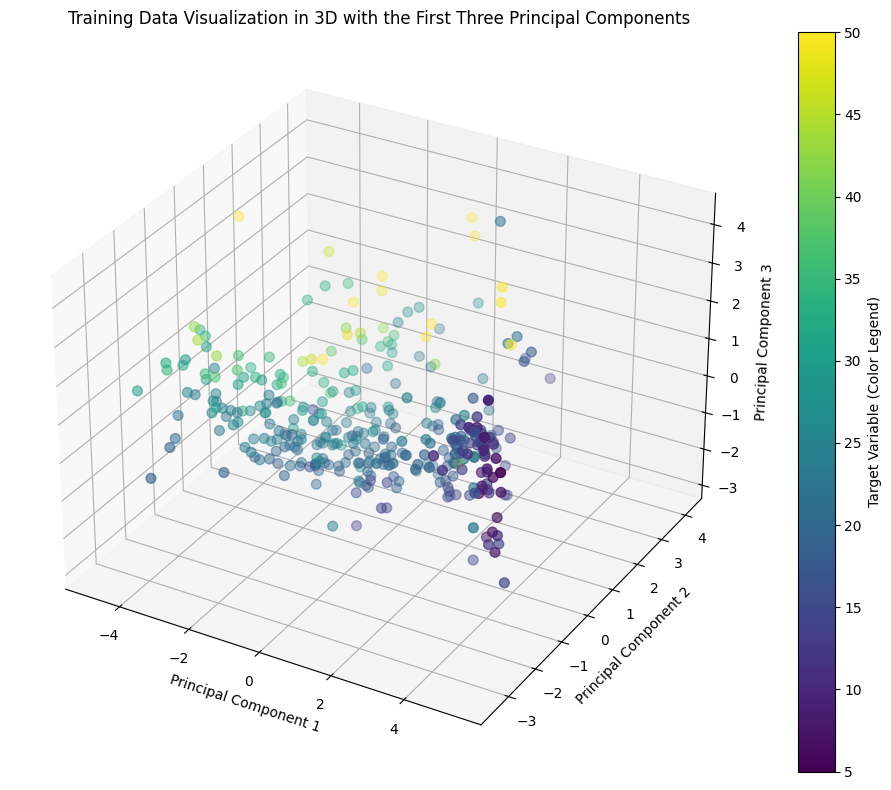

In [14]:
# Plot
fig_train = plt.figure(figsize=(10, 8))
ax_train = fig_train.add_subplot(111, projection='3d')
ax_train.scatter(pca_df_train['PC1'], pca_df_train['PC2'], pca_df_train['PC3'], c=ytrain, cmap='viridis', s=50)
ax_train.set_xlabel('Principal Component 1')
ax_train.set_ylabel('Principal Component 2')
ax_train.set_zlabel('Principal Component 3')
ax_train.set_title('Training Data Visualization in 3D with the First Three Principal Components')
# legend
norm = Normalize(vmin=ytrain.min(), vmax=ytrain.max())
sm_train = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm_train.set_array([])
cbar_train = plt.colorbar(sm_train, ax=ax_train, label='Target Variable (Color Legend)')

plt.tight_layout()
plt.show()

### plot first 3 principal component for **test data**

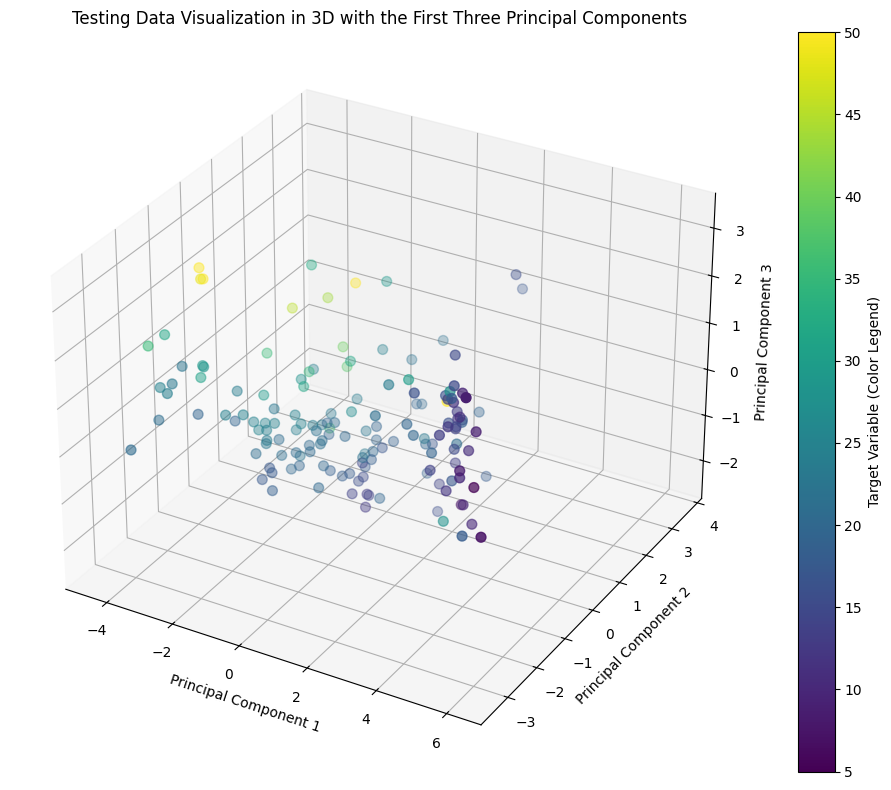

In [15]:
# Plot
fig_test = plt.figure(figsize=(10, 8))
ax_test = fig_test.add_subplot(111, projection='3d')
scatter_test = ax_test.scatter(pca_df_test['PC1'], pca_df_test['PC2'], pca_df_test['PC3'], c=ytest, cmap='viridis', s=50)
ax_test.set_xlabel('Principal Component 1')
ax_test.set_ylabel('Principal Component 2')
ax_test.set_zlabel('Principal Component 3')
ax_test.set_title('Testing Data Visualization in 3D with the First Three Principal Components')
# legends
norm = Normalize(vmin=ytest.min(), vmax=ytest.max())
sm_test = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm_test.set_array([])
cbar_test = plt.colorbar(sm_test, ax=ax_test, label='Target Variable (Color Legend)')

plt.tight_layout()
plt.show()

## Calculate MSE & R^2 

In [16]:
# Standardize & Zero-mean
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

#  PCA for first three principal components
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

pca_df_train = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df_test = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2', 'PC3'])

model_pca = make_pipeline(StandardScaler(), LinearRegression())
model_pca.fit(pca_df_train, ytrain)

# Predictions on train & Test
train_predictions_pca = model_pca.predict(pca_df_train)
test_predictions_pca = model_pca.predict(pca_df_test)

# MSE & R^2 & Coefficients for train and Test
mse_train_pca = mean_squared_error(ytrain, train_predictions_pca)
r2_train_pca = r2_score(ytrain, train_predictions_pca)
mse_test_pca = mean_squared_error(ytest, test_predictions_pca)
r2_test_pca = r2_score(ytest, test_predictions_pca)
coefficients_pca = model_pca['linearregression'].coef_
intercept_pca = model_pca['linearregression'].intercept_

# results
print("\nTrain MSE:", mse_train_pca)
print("Test MSE:", mse_test_pca)
print("\nTrain R-squared (R2):", r2_train_pca)
print("Test R-squared (R2):", r2_test_pca)
print("\nCoefficients:", coefficients_pca)
print("Intercept:", intercept_pca)


Train MSE: 30.075950417266355
Test MSE: 29.859586993147246

Train R-squared (R2): 0.6578255066735512
Test R-squared (R2): 0.599270614573368

Coefficients: [-5.61607112  3.57973924  3.66957642]
Intercept: 23.01581920903955


<div style="text-align: right; direction: rtl;">

- در این قسمت کاهش بعد را بدون نیاز به خروجی، بر روی متغیرها و ویژگی ها انجام داده ایم؛ در نتیجه حجم محاسبات و پردازش کاهش میابد. ولی در عوض همانطور که از نتایج مشاهده میشود، مقدار MSE و R^2 نسبت به حالات قبل، کمی بدتر شده است.

- بنابراین به طور کلی در یک مسئله هدف مهم است که کاهش حجم محاسبات و پردازش در اولویت قرار دارد و یا کاهش میزان خطا.

</div>

---

# D) Ridge Regression

## alpha

In [17]:
# Define alpha 
alphas = 10**np.linspace(3, -3, 100) * 0.5
alphas

array([5.00000000e+02, 4.34874501e+02, 3.78231664e+02, 3.28966612e+02,
       2.86118383e+02, 2.48851178e+02, 2.16438064e+02, 1.88246790e+02,
       1.63727458e+02, 1.42401793e+02, 1.23853818e+02, 1.07721735e+02,
       9.36908711e+01, 8.14875417e+01, 7.08737081e+01, 6.16423370e+01,
       5.36133611e+01, 4.66301673e+01, 4.05565415e+01, 3.52740116e+01,
       3.06795364e+01, 2.66834962e+01, 2.32079442e+01, 2.01850863e+01,
       1.75559587e+01, 1.52692775e+01, 1.32804389e+01, 1.15506485e+01,
       1.00461650e+01, 8.73764200e+00, 7.59955541e+00, 6.60970574e+00,
       5.74878498e+00, 5.00000000e+00, 4.34874501e+00, 3.78231664e+00,
       3.28966612e+00, 2.86118383e+00, 2.48851178e+00, 2.16438064e+00,
       1.88246790e+00, 1.63727458e+00, 1.42401793e+00, 1.23853818e+00,
       1.07721735e+00, 9.36908711e-01, 8.14875417e-01, 7.08737081e-01,
       6.16423370e-01, 5.36133611e-01, 4.66301673e-01, 4.05565415e-01,
       3.52740116e-01, 3.06795364e-01, 2.66834962e-01, 2.32079442e-01,
      

## MSE VS alpha

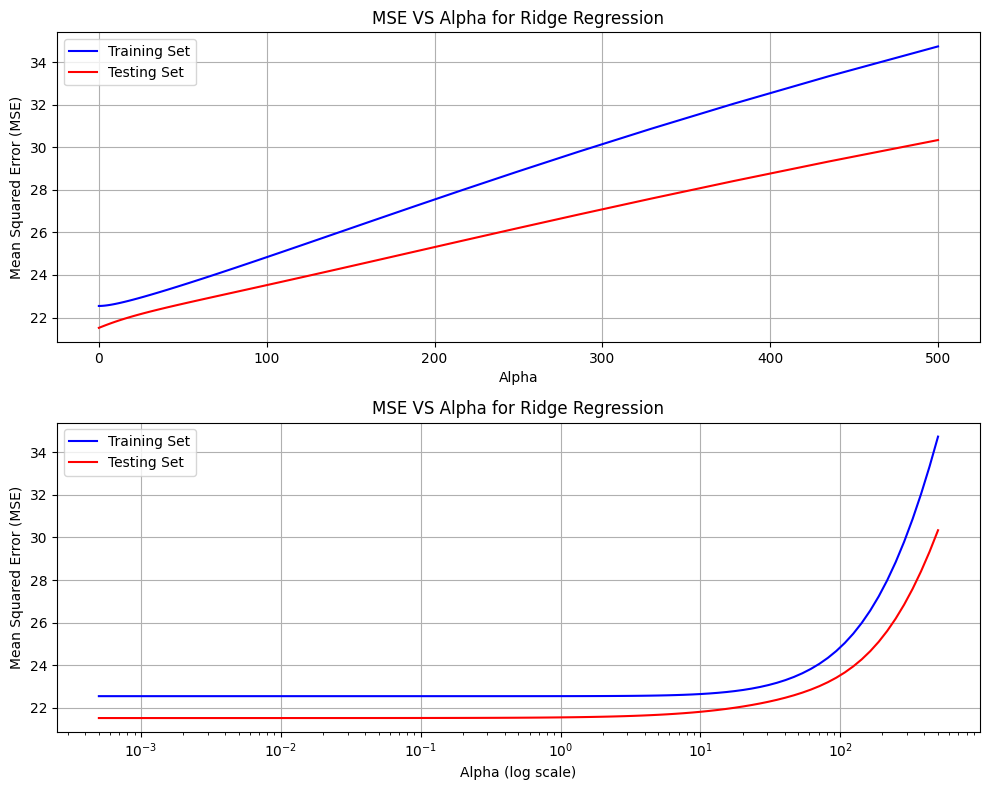

In [18]:
# Standardize & Zero-mean
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

mse_train_list = []
mse_test_list = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    # ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    ridge_model.fit(X_train_scaled, ytrain)

    # train & test Predictions 
    train_predictions = ridge_model.predict(X_train_scaled)
    test_predictions = ridge_model.predict(X_test_scaled)

    # MSE 
    mse_train = mean_squared_error(ytrain, train_predictions)
    mse_test = mean_squared_error(ytest, test_predictions)

    # Append MSE values to the lists
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

# Plot 
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(alphas, mse_train_list, label='Training Set', color='b')
plt.plot(alphas, mse_test_list, label='Testing Set', color='r')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE VS Alpha for Ridge Regression')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(alphas, mse_train_list, label='Training Set', color='b')
plt.plot(alphas, mse_test_list, label='Testing Set', color='r')
# log scale 
plt.xscale('log') 
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE VS Alpha for Ridge Regression')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Coeffiecients VS alpha

### Train Coefficients

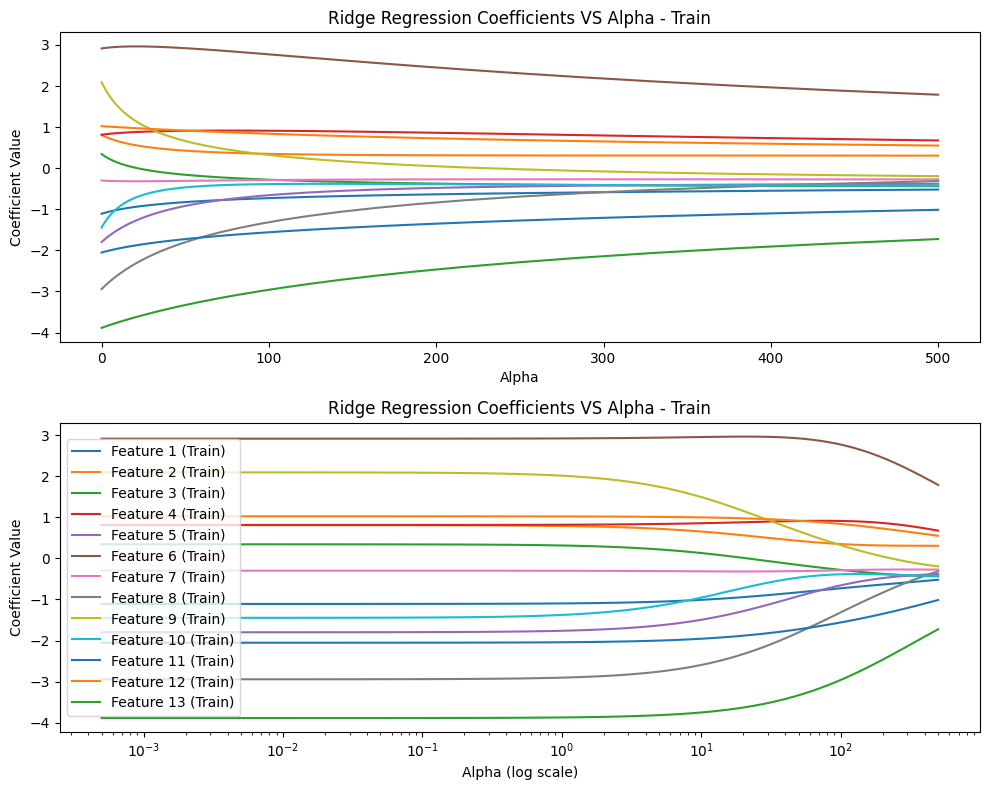

In [19]:
coefficients_train = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, ytrain)

    coefficients_train.append(ridge_model.coef_)
    
coefficients_train = np.array(coefficients_train)

# Plot 
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
for i in range(Xtrain.shape[1]): 
    plt.plot(alphas, coefficients_train[:, i], label=f'Feature {i + 1} (Train)')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients VS Alpha - Train')

plt.subplot(2,1,2)
for i in range(Xtrain.shape[1]):  
    plt.plot(alphas, coefficients_train[:, i], label=f'Feature {i + 1} (Train)')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients VS Alpha - Train')
plt.legend()

plt.tight_layout()
plt.show()

### Test Coefficients

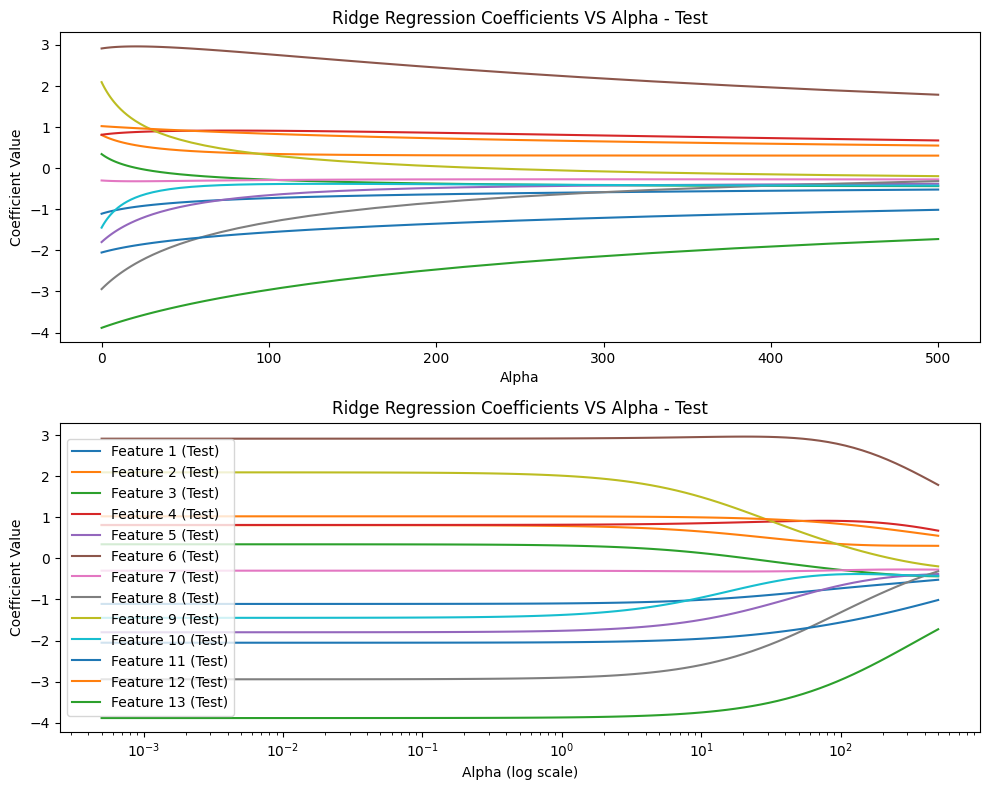

In [21]:
coefficients_test = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, ytrain)

    coefficients_test.append(ridge_model.coef_)

coefficients_test = np.array(coefficients_test)

# Plot
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
for i in range(Xtrain.shape[1]):  
    plt.plot(alphas, coefficients_test[:, i], label=f'Feature {i + 1} (Test)')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients VS Alpha - Test')

plt.subplot(2,1,2)
for i in range(Xtrain.shape[1]):  
    plt.plot(alphas, coefficients_test[:, i], label=f'Feature {i + 1} (Test)')
plt.xscale('log') 
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients VS Alpha - Test')
plt.legend()

plt.tight_layout()
plt.show()


### Train & Test Coefficients

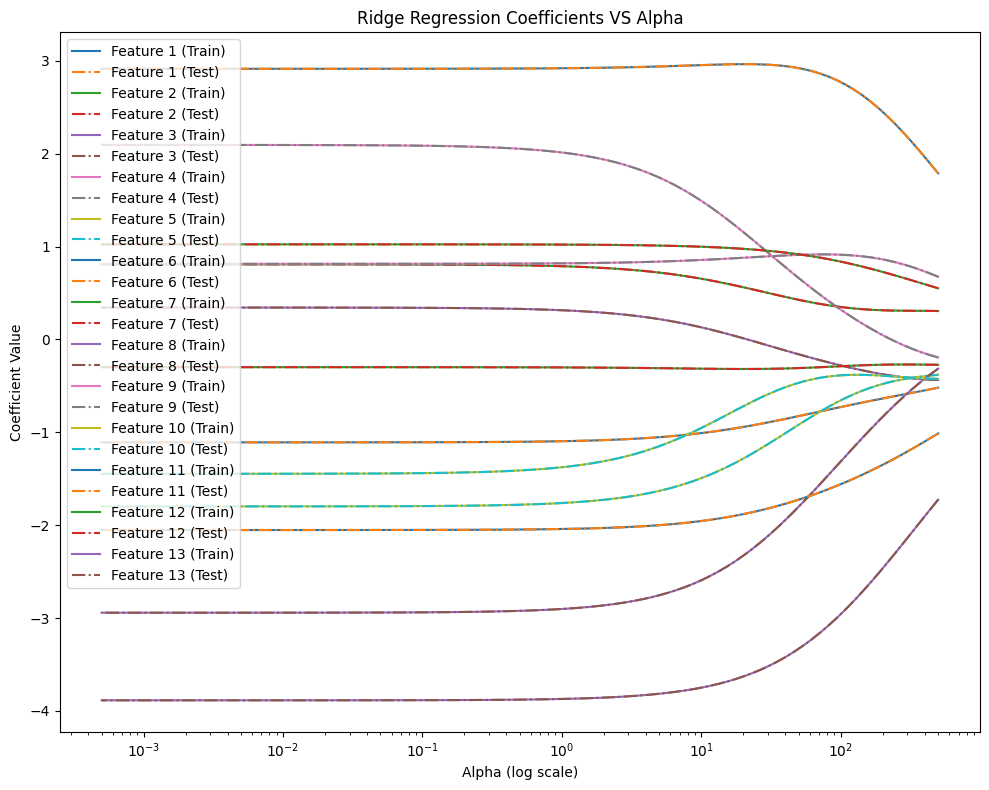

In [22]:
# Plot 
plt.figure(figsize=(10, 8))
for i in range(Xtrain.shape[1]):  
    plt.plot(alphas, coefficients_train[:, i], label=f'Feature {i + 1} (Train)')
    plt.plot(alphas, coefficients_test[:, i], label=f'Feature {i + 1} (Test)', linestyle='-.')

plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients VS Alpha')
plt.legend()
plt.tight_layout()
plt.show()

<div style="text-align: right; direction: rtl;">

- همانطور که از نمودارها مشخص است و میدانیم، روش رگرسیون Ridge ضرایب را کاهش میدهد ولی نمیتواند آنها رو به طور دقیق به صفر برساند و به نوعی حذف کند. 
در نمودارها نیز میتوانیم این مورد را ملاحظه کنیم.

</div>

## Number of features Vs alpha

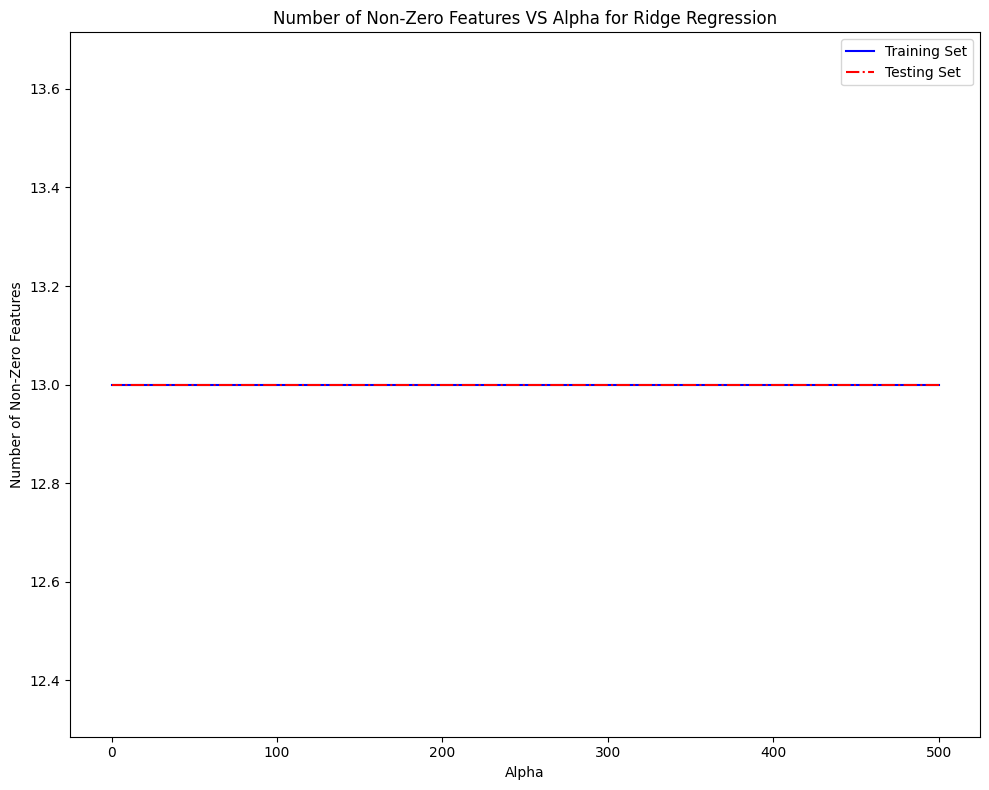

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

non_zero_features_train = []
non_zero_features_test = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, ytrain)

    # number of non-zero coefficients for train
    non_zero_train = np.sum(ridge_model.coef_ != 0)
    non_zero_features_train.append(non_zero_train)

    # number of non-zero coefficients for test
    non_zero_test = np.sum(ridge_model.coef_ != 0)
    non_zero_features_test.append(non_zero_test)

# Plot
plt.figure(figsize=(10, 8))
plt.plot(alphas, non_zero_features_train, label='Training Set', color='b')
plt.plot(alphas, non_zero_features_test, label='Testing Set', color='r', linestyle='-.')
plt.xlabel('Alpha')
plt.ylabel('Number of Non-Zero Features')
plt.title('Number of Non-Zero Features VS Alpha for Ridge Regression')
plt.legend()

plt.tight_layout()
plt.show()

<div style="text-align: right; direction: rtl;">

- با توجه به شکل، نشان می دهد که به ازای هر مقدار آلفایی، ویژگی حذف نمیشود و همگی در مدل حضور دارند (این مورد را در نمودار قسمت قبل نیز ملاحظه کرده بودیم که هیچ ویژگی صفر و حذف نمی شود)
</div>

## Calculate MSE & R^2 & Coefficient by using optimal alpha

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

# Use RidgeCV model with cross-validation
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_scaled, ytrain)
# Get the optimal alpha
optimal_alpha = ridge_cv.alpha_

# Create Ridge model with the optimal alpha
ridge_model = Ridge(alpha=optimal_alpha)
ridge_model.fit(X_train_scaled, ytrain)

# Predictions on training and testing sets
y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

# MSE & R^2
mse_train = mean_squared_error(ytrain, y_train_pred)
mse_test = mean_squared_error(ytest, y_test_pred)
r2_train = r2_score(ytrain, y_train_pred)
r2_test = r2_score(ytest, y_test_pred)

# Coefficients
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_

# results
print("Optimal Alpha:", optimal_alpha)
print("MSE (Training):", mse_train)
print("MSE (Testing):", mse_test)
print("R^2 (Training):", r2_train)
print("R^2 (Testing):", r2_test)
print("Coefficients:", coefficients)
print("intercept:", intercept)

Optimal Alpha: 7.599555414764666
MSE (Training): 22.608900721202943
MSE (Testing): 21.74527002724947
R^2 (Training): 0.7427782317228347
R^2 (Testing): 0.7081684788220384
Coefficients: [-1.02851382  0.68304446  0.16903735  0.84785674 -1.55637072  2.94764687
 -0.31283947 -2.66774785  1.60323003 -1.03824863 -1.97593737  1.00387558
 -3.78047145]
intercept: 23.01581920903955


<div style="text-align: right; direction: rtl;">

- **نتایج بدست آمده بسیار نزدیک و تقریبا برابر با نتایجی است که در حالت اول با مدل رگرسیون معمولی بدست آوردیم.
رگرسیون ridge زمانی میتواند تاثیر بسیار خوب و قابل توجهی بگذارد که نمونه های کمی داشته باشیم؛ و همچنین در شرایطی که تعداد نمونه ها زیاد باش، عملکرد خوبی نخواهد داشت.**

در حالت کلی تر داریم:

1. **ضرایب (Coefficients):**
   - **رگرسیون معمولی (Ordinary Least Squares - OLS):** در این روش، ضرایب به صورت مستقیم از مینیمم کردن مجموع مربعات خطا بدست می‌آیند و مقادیر آنها بدون هیچگونه تنظیمی به داده‌ها اعمال می‌شوند.
   - **Ridge Regression:** به علت افزودن جمله تنظیمی (regularization term) به معادله هدف، ضرایب در اینجا تا حدی تنظیم می‌شوند و ممکن است به صفر کاهش یابند. این امر به کنترل اهمیت متغیرها کمک می‌کند.


2. **MSE (میانگین مربعات خطا):**
   - **رگرسیون معمولی (OLS):** MSE در اینجا به صورت کمینه کردن مجموع مربعات خطا محاسبه می‌شود، و ممکن است در مواجه با داده‌های نویزی بزرگ شود.
   - **Ridge Regression:** به دلیل افزودن جمله تنظیمی، MSE در اینجا شامل دو قسمت است: یک قسمت مربوط به مناسب کردن داده‌ها و دیگری مربوط به تنظیم مقادیر ضرایب. این امر به کاهش حساسیت به داده‌های نویزی کمک می‌کند.

3. **R^2 (ضریب تعیین):**
   - **رگرسیون معمولی (OLS):** R^2 مقداری بین 0 و 1 است و نشان‌دهنده میزان توضیح داده‌شدن تغییرات وابسته به متغیرهای مستقل توسط مدل است.
   - **Ridge Regression:** مشابه R^2 در رگرسیون معمولی، اما به علت تنظیم مقادیر ضرایب، ممکن است در مواجه با داده‌های نویزی و حالت‌های انعطاف‌پذیری (overfitting) بهتر عمل کند.

</div>

---

# E) Lasso Regression

## alpha

In [27]:
# Define alpha 
alphas = 10**np.linspace(3, -3, 100) * 0.5

## MSE VS alpha

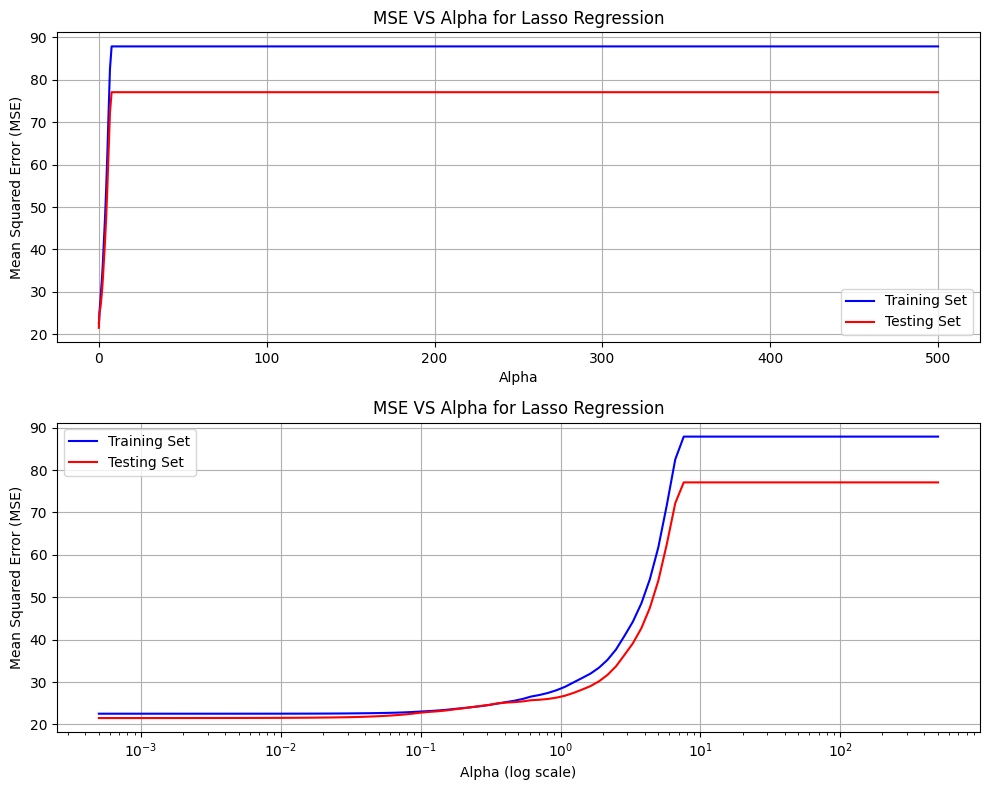

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

mse_train_list = []
mse_test_list = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, ytrain)

    # Predictions on train & Test
    train_predictions = lasso_model.predict(X_train_scaled)
    test_predictions = lasso_model.predict(X_test_scaled)

    # MSE for train and test
    mse_train = mean_squared_error(ytrain, train_predictions)
    mse_test = mean_squared_error(ytest, test_predictions)

    # Append MSE values to the lists
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

# Plot
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(alphas, mse_train_list, label='Training Set', color='b')
plt.plot(alphas, mse_test_list, label='Testing Set', color='r')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE VS Alpha for Lasso Regression')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(alphas, mse_train_list, label='Training Set', color='b')
plt.plot(alphas, mse_test_list, label='Testing Set', color='r')
# log scale 
plt.xscale('log') 
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE VS Alpha for Lasso Regression')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Coefficient VS alpha

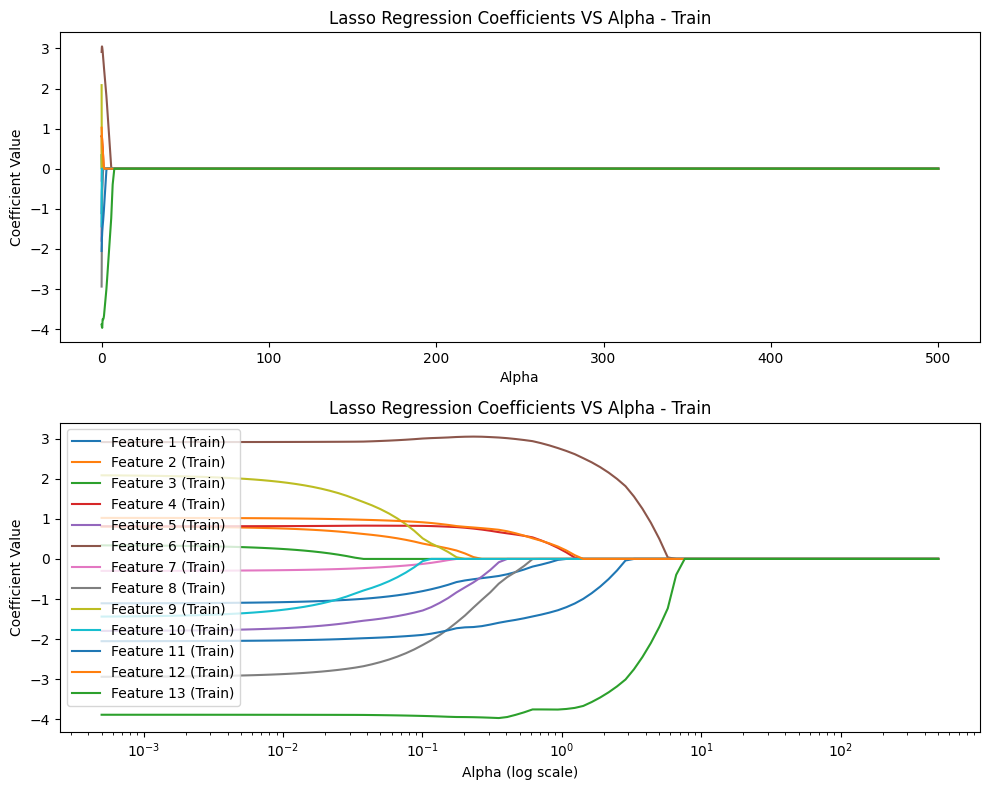

In [29]:
coefficients_train = []

for alpha in alphas:
   lasso_model = Lasso(alpha=alpha)
   lasso_model.fit(X_train_scaled, ytrain)

   coefficients_train.append(lasso_model.coef_)
    
coefficients_train = np.array(coefficients_train)

# Plot 
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
for i in range(Xtrain.shape[1]): 
    plt.plot(alphas, coefficients_train[:, i], label=f'Feature {i + 1} (Train)')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients VS Alpha - Train')

plt.subplot(2,1,2)
for i in range(Xtrain.shape[1]):  
    plt.plot(alphas, coefficients_train[:, i], label=f'Feature {i + 1} (Train)')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients VS Alpha - Train')
plt.legend()

plt.tight_layout()
plt.show()

## number of features VS alpha

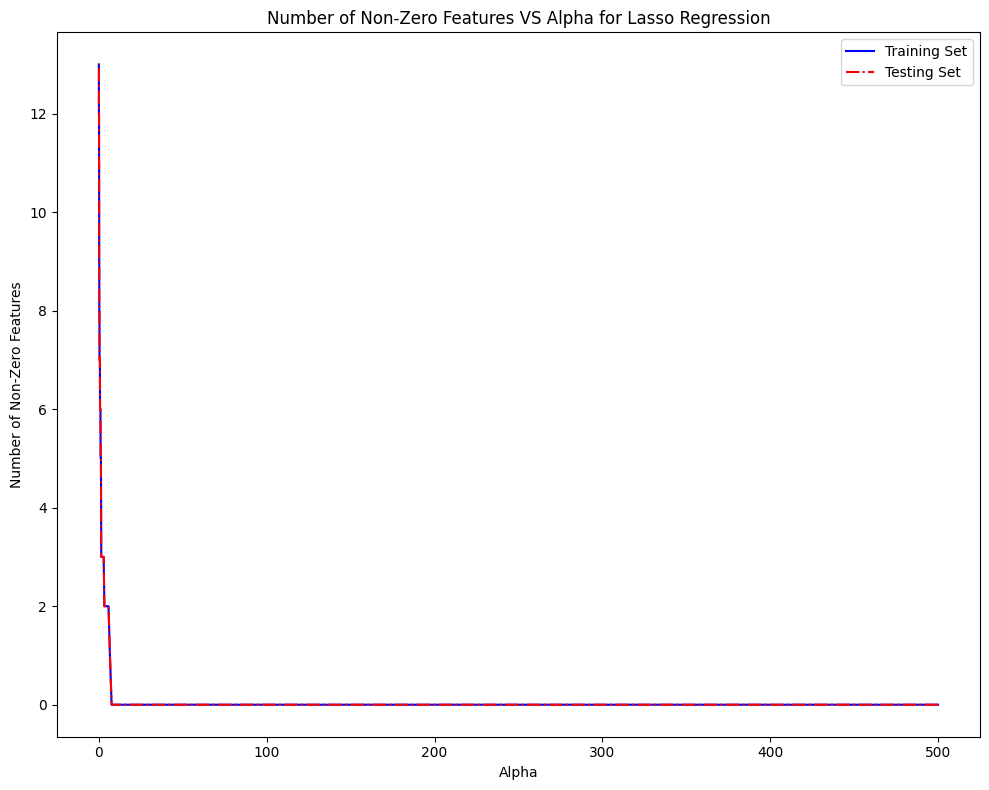

In [30]:
non_zero_features_train = []
non_zero_features_test = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, ytrain)

    # number of non-zero coefficients for train
    non_zero_train = np.sum(lasso_model.coef_ != 0)
    non_zero_features_train.append(non_zero_train)

    # number of non-zero coefficients for test
    non_zero_test = np.sum(lasso_model.coef_ != 0)
    non_zero_features_test.append(non_zero_test)

# Plot
plt.figure(figsize=(10, 8))
plt.plot(alphas, non_zero_features_train, label='Training Set', color='b')
plt.plot(alphas, non_zero_features_test, label='Testing Set', color='r', linestyle='-.')
plt.xlabel('Alpha')
plt.ylabel('Number of Non-Zero Features')
plt.title('Number of Non-Zero Features VS Alpha for Lasso Regression')
plt.legend()

plt.tight_layout()
plt.show()

<div style="text-align: center; direction: rtl;">
با توجه به شکل، نشان می دهد که با افزایش مقدار آلفا، تعداد ویژگی های حذف شده افزایش خواهد یافت.
</div>

## Calculate MSE & R^2 & Coefficient by using optimal alpha

In [31]:
optimal_alpha = None
min_mse = float('inf')

optimal_model = None
optimal_coefficients_train = None
optimal_intercept_train = None
optimal_test_predictions = None

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, ytrain)

    # Predictions on the train and test
    train_predictions = lasso_model.predict(X_train_scaled)
    test_predictions = lasso_model.predict(X_test_scaled)

    # Calculate MSE for the train and test
    mse_train = mean_squared_error(ytrain, train_predictions)
    mse_test = mean_squared_error(ytest, test_predictions)

    # Update optimal results 
    if mse_test < min_mse:
        min_mse = mse_test
        optimal_alpha = alpha
        optimal_model = lasso_model
        optimal_coefficients_train = lasso_model.coef_
        optimal_intercept_train = lasso_model.intercept_
        optimal_test_predictions = test_predictions


optimal_test_predictions = optimal_model.predict(X_test_scaled)

# Calculate MSE & R^2 
mse_train_optimal = mean_squared_error(ytrain, optimal_model.predict(X_train_scaled))
r2_train_optimal = r2_score(ytrain, optimal_model.predict(X_train_scaled))

mse_test_optimal = mean_squared_error(ytest, optimal_test_predictions)
r2_test_optimal = r2_score(ytest, optimal_test_predictions)

# Coefficients for the optimal model
optimal_coefficients_test = optimal_model.coef_
optimal_intercept_test = optimal_model.intercept_

# results
print("Optimal Alpha:", optimal_alpha)

print("\nOptimal Coefficients for Training Set:", optimal_coefficients_train)
print("Optimal Coefficients for Test Set:", optimal_coefficients_test)

print("\nOptimal Intercept for Training Set:", optimal_intercept_train)
print("Optimal Intercept for Test Set:", optimal_intercept_test)

print("\nMSE on Training Set with Optimal Alpha:", mse_train_optimal)
print("MSE on Test Set with Optimal Alpha:", mse_test_optimal)

print("\nR^2 on Training Set with Optimal Alpha:", r2_train_optimal)
print("R^2 on Test Set with Optimal Alpha:", r2_test_optimal)

Optimal Alpha: 0.0005

Optimal Coefficients for Training Set: [-1.10681388  0.80592651  0.33834221  0.81409794 -1.79455377  2.91401119
 -0.29800967 -2.9390048   2.08504143 -1.43809856 -2.05130511  1.02310993
 -3.88584591]
Optimal Coefficients for Test Set: [-1.10681388  0.80592651  0.33834221  0.81409794 -1.79455377  2.91401119
 -0.29800967 -2.9390048   2.08504143 -1.43809856 -2.05130511  1.02310993
 -3.88584591]

Optimal Intercept for Training Set: 23.01581920903955
Optimal Intercept for Test Set: 23.01581920903955

MSE on Training Set with Optimal Alpha: 22.545499677204766
MSE on Test Set with Optimal Alpha: 21.51947157076727

R^2 on Training Set with Optimal Alpha: 0.7434995462550594
R^2 on Test Set with Optimal Alpha: 0.711198797919123


<div style="text-align: right; direction: rtl;">

- **همانند قسمت رگرسیون ridge، در اینجا نیز نتایج به دست آمده تقریبا برابر با نتایجی است که در بخش اول برای رگرسیون معمولی بدست آورده بودیم.
رگرسیون Lasso نیز زمانی میتواند تاثیر بسیار خوب و قابل توجهی بگذارد که نمونه های کمی داشته باشیم؛ و همچنین در شرایطی که تعداد نمونه ها زیاد باش، عملکرد خوبی نخواهد داشت.**

به طور کلی:

1. **ضرایب (Coefficients):**
   - **رگرسیون معمولی (OLS):** ضرایب در این روش به صورت مستقیم از مینیمم کردن مجموع مربعات خطا بدست می‌آیند و مقادیر آنها بدون هیچگونه تنظیمی به داده‌ها اعمال می‌شوند.
   - **رگرسیون لسو (Lasso Regression):** مشابه رگرسیون Ridge، اما با افزودن جمله تنظیمی دیگری به معادله هدف که مقادیر ضرایب را به صفر می‌کشد. این امر باعث sparsity در مدل می‌شود و برخی از ضرایب به صفر میل می‌کنند.

2. **MSE (میانگین مربعات خطا):**
   - **رگرسیون معمولی (OLS):** MSE در اینجا به صورت کمینه کردن مجموع مربعات خطا محاسبه می‌شود، و ممکن است در مواجه با داده‌های نویزی بزرگ شود.
   - **رگرسیون لسو (Lasso Regression):** با افزودن جمله تنظیمی به معادله هدف، MSE در اینجا نه تنها تلاش می‌کند مجموع مربعات خطا را کمینه بلکه همچنین سعی میکند تا تعداد متغیرهای مهم در مدل به حداقل برسد.

3. **R^2 (ضریب تعیین):**
   - **رگرسیون معمولی (OLS):** R^2 مقداری بین 0 و 1 است و نشان‌دهنده میزان توضیح داده‌شدن تغییرات وابسته به متغیرهای مستقل توسط مدل است.
   - **رگرسیون لسو (Lasso Regression):** مشابه R^2 در رگرسیون معمولی، اما با افزودن جمله تنظیمی، ممکن است بهتر در مواجه با داده‌های نویزی و انعطاف‌پذیری (overfitting) عمل کند.

</div>

---

# F)

In [32]:
features = df.drop('MEDV', axis=1)
y_target = df['MEDV']

## R^2

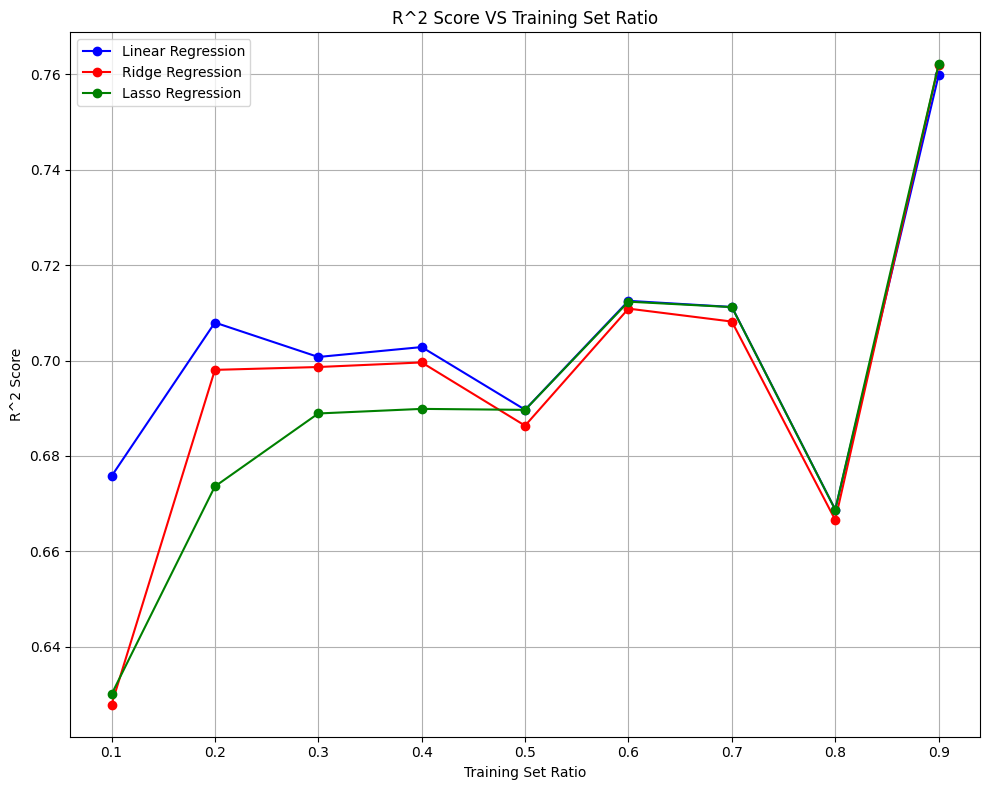

Optimal Alpha for Ridge: [30.679536367065865, 23.207944168063886, 20.18508629298277, 17.555958671075654, 10.046165012825234, 7.599555414764666, 7.599555414764666, 7.599555414764666, 5.0]
Optimal Alpha for Lasso: [0.616423369721033, 0.7087370814634024, 0.20185086292982768, 0.13280438914733433, 0.0005, 0.006164233697210329, 0.0005, 0.0005, 0.0286118382967511]


In [34]:
# Vary the training data ratio
ratios = np.linspace(0.1, 0.9, 9)
alphas = 10**np.linspace(3, -3, 100) * 0.5

# R^2 values for each model
r2_linear = []
r2_ridge = []
r2_lasso = []

# optimal alphas
optimal_alpha_ridge = []
optimal_alpha_lasso = []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(features, y_target, test_size=1-ratio, random_state=42)

    # Standardize & Zero mean
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train_scaled, y_train)
    y_pred_linear = linear_model.predict(X_test_scaled)
    r2_linear.append(r2_score(y_test, y_pred_linear))

    # Ridge Regression with Cross-Validation
    ridge_cv_model = RidgeCV(alphas=alphas)
    ridge_cv_model.fit(X_train_scaled, y_train)
    optimal_alpha_ridge.append(ridge_cv_model.alpha_)
    y_pred_ridge = ridge_cv_model.predict(X_test_scaled)
    r2_ridge.append(r2_score(y_test, y_pred_ridge))

    # Lasso Regression with Cross-Validation
    lasso_cv_model = LassoCV(alphas=alphas)
    lasso_cv_model.fit(X_train_scaled, y_train)
    optimal_alpha_lasso.append(lasso_cv_model.alpha_)
    y_pred_lasso = lasso_cv_model.predict(X_test_scaled)
    r2_lasso.append(r2_score(y_test, y_pred_lasso))

# Plot
plt.figure(figsize=(10, 8))
plt.plot(ratios, r2_linear, marker='o', label='Linear Regression', color='b')
plt.plot(ratios, r2_ridge, marker='o', label='Ridge Regression', color='r')
plt.plot(ratios, r2_lasso, marker='o', label='Lasso Regression', color='g')

plt.title('R^2 Score VS Training Set Ratio')
plt.xlabel('Training Set Ratio')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Print optimal alphas
print("Optimal Alpha for Ridge:", optimal_alpha_ridge)
print("Optimal Alpha for Lasso:", optimal_alpha_lasso)


<div style="text-align: right; direction: rtl;">

- **نمودار R^2 بر حسب نسبت داده‌های آموزشی به کل داده‌ها نشان می‌دهد که چگونه عملکرد مدل‌های رگرسیون خطی، Ridge، و Lasso تغییر می‌کند در وابستگی به تعداد داده‌هایی که برای آموزش مدل استفاده می‌شود.**

**در ابتدا با افزایش تعداد نمونه ها چون R^2 نیز بهتر Train خواهد شد، مقدار آن افزایشی خواهد بود
و همچنین در آخر چون تعداد نمونه زیاد شده است، overfitting کم و کمتر میشود و باعث میشود که R^2 روند صعودی به خود بگیرد.**

به طور کلی:

1. افزایش عملکرد با افزایش داده‌های آموزشی:
   - با افزایش نسبت داده‌های آموزشی، R^2 برای هر سه روش افزایش می‌یابد. این نشان‌دهنده این است که با افزایش تعداد داده‌ها، مدل‌ها بهتر می‌توانند داده‌ها را توجیه کنند و دقت پیش‌بینی بیشتری داشته باشند.

2. تفاوت در عملکرد مدل‌ها:
   - تفاوت در R^2 برای هر روش ممکن است نشان‌دهنده تأثیر نویز داده، انتخاب متغیرها، و تعداد متغیرها در مدل باشد. اگر R^2 برای یک روش نسبت به دیگری بیشتر باشد، ممکن است آن روش بهتر با داده‌های موجود سازگاری پیدا کرده باشد.


</div>

## alpha

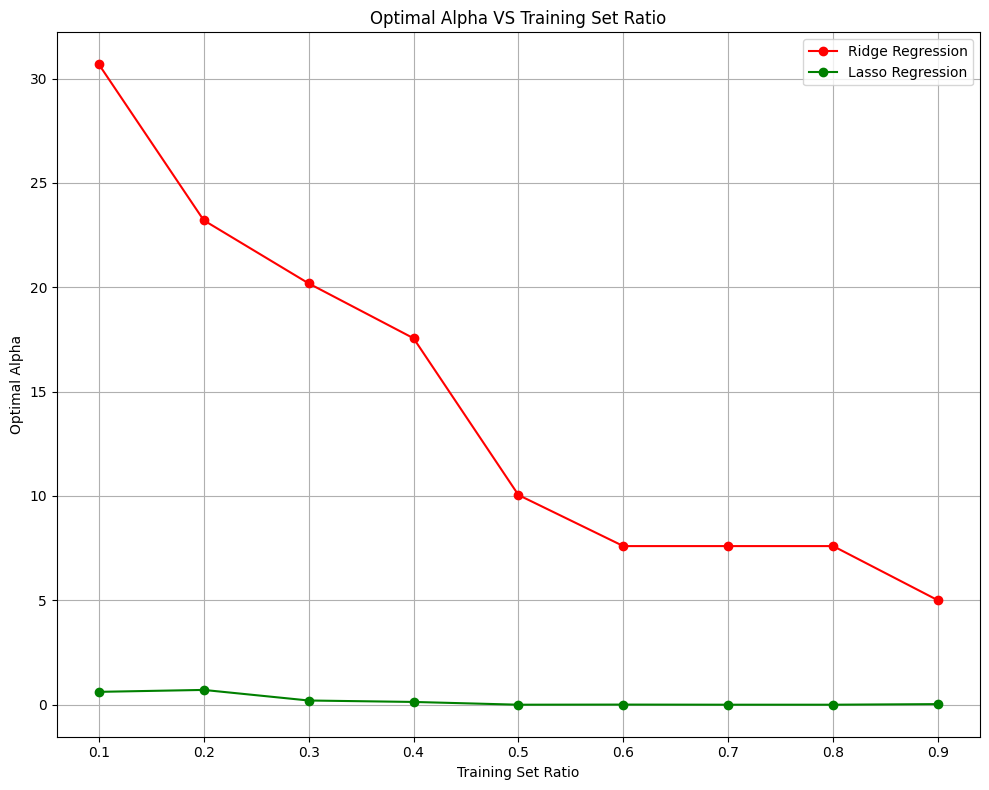

In [37]:
optimal_alpha_ridge = []
optimal_alpha_lasso = []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(features, y_target, test_size=1-ratio, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Ridge Regression with Cross-Validation
    ridge_cv_model = RidgeCV(alphas=alphas)
    ridge_cv_model.fit(X_train_scaled, y_train)
    optimal_alpha_ridge.append(ridge_cv_model.alpha_)

    # Lasso Regression with Cross-Validation
    lasso_cv_model = LassoCV(alphas=alphas)
    lasso_cv_model.fit(X_train_scaled, y_train)
    optimal_alpha_lasso.append(lasso_cv_model.alpha_)

# Plot
plt.figure(figsize=(10, 8))
plt.plot(ratios, optimal_alpha_ridge, marker='o', label='Ridge Regression', color='r')
plt.plot(ratios, optimal_alpha_lasso, marker='o', label='Lasso Regression', color='g')
plt.title('Optimal Alpha VS Training Set Ratio')
plt.xlabel('Training Set Ratio')
plt.ylabel('Optimal Alpha')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<div style="text-align: right; direction: rtl;">

- همانطور که از نمودار مشخص است، هنگامی که نسبت داده های آموزشی به کل داده ها را زیاد میکنیم، مقدار آلفا کاهش میابد؛ زیرا هنگامیکه تعداد نمونه ها زیاد میشود، دیگر overfitting نخواهیم داشت. با تحلیل این تغییرات، میتوان بهترین نسبت داده‌های آموزشی به کل داده‌ها را برای هر روش Ridge و Lasso انتخاب کرد. این تحلیل می‌تواند کمک کند تا میزان بهینه‌ای از داده‌های آموزشی برای مدل استفاده کرد و از بیش‌برازش (overfitting) یا کم‌برازش (underfitting) جلوگیری کرد.

</div>

---
